In [5]:
import laspy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import ConvexHull
from scipy.interpolate import griddata

### Read the Aerial LiDAR Data

In [6]:
# Replace with the path to your .laz file
laz_file_path = 'CA_SoCal_Wildfires_B4_2018_Sedgwick_TREX24_1.laz'

# Open the .laz file using laspy
with laspy.open(laz_file_path) as las:
    # Read the point data
    point_cloud = las.read()
    
# Convert point cloud to numpy arrays
x = np.array(point_cloud.x)
y = np.array(point_cloud.y)
z = np.array(point_cloud.z)

# print some basic information about the file
print(f"Number of points: {len(x)}")
print(f"File header information: {las.header}")

Number of points: 2734782
File header information: <LasHeader(1.2, <PointFormat(3, 0 bytes of extra dims)>)>


### Calculate Basic EDA Features

            x           y       z
0 -2162641.88  1567600.01  413.74
1 -2162639.88  1567600.00  414.38
2 -2162639.19  1567600.00  414.47
3 -2162637.82  1567600.01  414.59
4 -2162637.15  1567600.01  414.74
Basic Statistics:
                  x             y             z
count  2.734782e+06  2.734782e+06  2.734782e+06
mean  -2.162712e+06  1.567589e+06  3.944201e+02
std    4.065550e+01  1.441702e+02  1.403060e+01
min   -2.162798e+06  1.567307e+06  3.644600e+02
25%   -2.162742e+06  1.567470e+06  3.839200e+02
50%   -2.162714e+06  1.567599e+06  3.938800e+02
75%   -2.162686e+06  1.567718e+06  4.061500e+02
max   -2.162611e+06  1.567841e+06  4.402700e+02


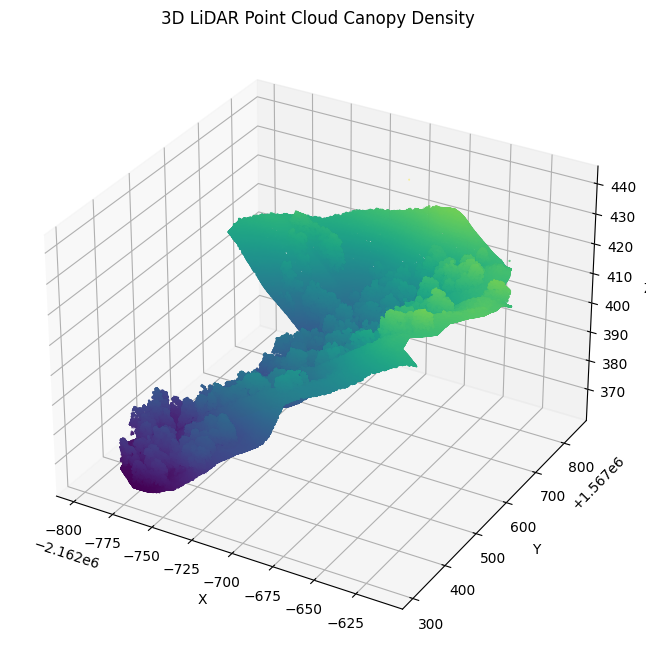

Point Density (points per square unit area): 27.47


In [7]:
# Convert LiDAR data into a Pandas DataFrame for easier exploration
# Create a DataFrame from the LiDAR point cloud data
df = pd.DataFrame({'x': x.tolist(), 'y': y.tolist(), 'z': z.tolist()})

# Verify the DataFrame is correctly created
print(df.head())

# Basic descriptive statistics
print("Basic Statistics:")
print(df.describe())

# Plot the 3D point cloud distribution
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, s=0.1, c=z, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('3D LiDAR Point Cloud Canopy Density')
plt.show()

# Calculate point density
point_density = len(x) / (np.ptp(x) * np.ptp(y))  # Point density = points per unit area
print(f"Point Density (points per square unit area): {point_density:.2f}")

### Canopy Height Model (CHM) and Vegetation Analysis

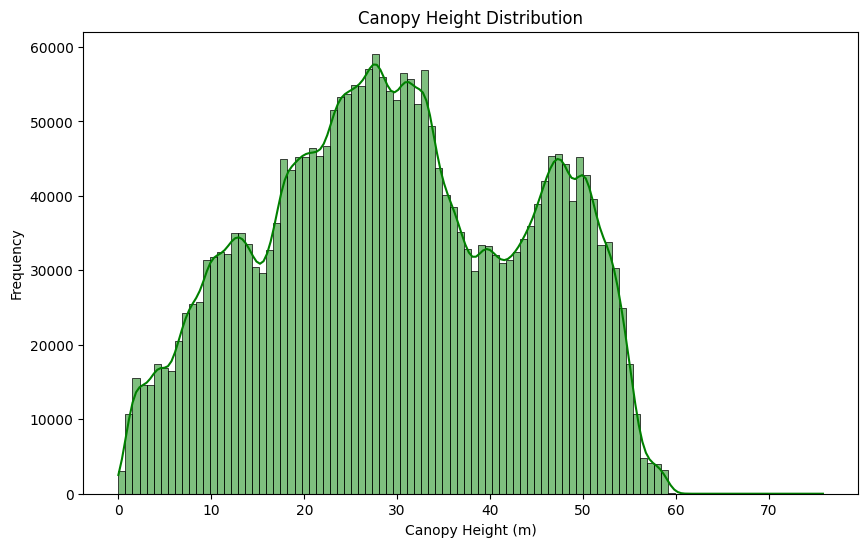

In [8]:
# Ground points are typically the lowest Z values, you can define a threshold or use a statistical approach
ground_threshold = np.percentile(z, 10)  # For simplicity, using 10th percentile as ground threshold
ground_points = z[z <= ground_threshold]

# Calculate the canopy height by subtracting ground elevation from overall point heights
canopy_height = z - np.min(ground_points)

# Visualize Canopy Height Distribution
plt.figure(figsize=(10, 6))
sns.histplot(canopy_height, bins=100, color='green', kde=True)
plt.title('Canopy Height Distribution')
plt.xlabel('Canopy Height (m)')
plt.ylabel('Frequency')
plt.show()

### Terrain Slope Analysis

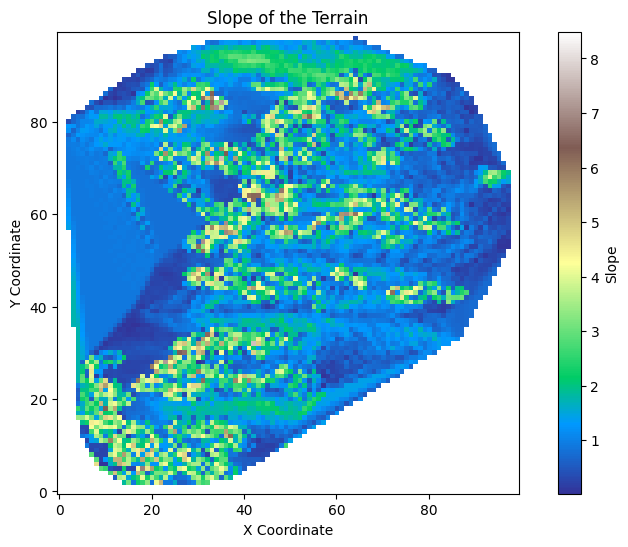

In [9]:
#Define the grid resolution (assuming x and y are uniformly spaced in a region)
grid_x, grid_y = np.meshgrid(np.linspace(np.min(x), np.max(x), 100), np.linspace(np.min(y), np.max(y), 100))

# Interpolate the z-values (elevation) onto this grid
grid_z = griddata((x, y), z, (grid_x, grid_y), method='linear')

# Calculate slope (gradient) using numpy's gradient function
dx, dy = np.gradient(grid_z, axis=(1, 0))  # Calculate gradients in x and y direction

# Calculate the slope (magnitude of the gradient)
slope = np.sqrt(dx**2 + dy**2)

# Visualize the slope
plt.figure(figsize=(10, 6))
plt.imshow(slope, cmap='terrain', origin='lower')
plt.colorbar(label='Slope')
plt.title('Slope of the Terrain')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

### Canopy Density and Vegetation Structure

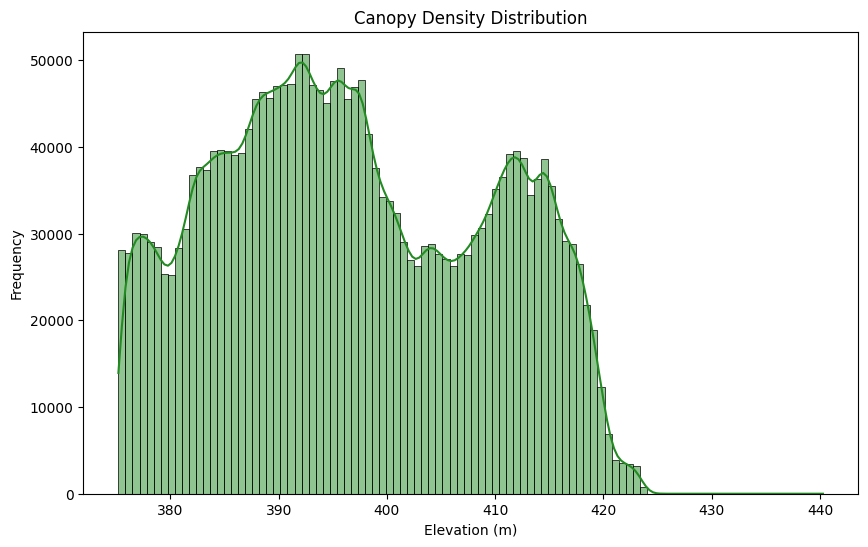

In [10]:
# Canopy density can be analyzed by filtering out ground points
canopy_points = z[z > ground_threshold]

# Visualize the density of canopy points
plt.figure(figsize=(10, 6))
sns.histplot(canopy_points, bins=100, color='forestgreen', kde=True)
plt.title('Canopy Density Distribution')
plt.xlabel('Elevation (m)')
plt.ylabel('Frequency')
plt.show()